
In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.

The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

Data Description -
Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,classification_report,roc_auc_score
from sklearn import ensemble

# To not get tensed over unnecessary warnings we will ignore them

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = "/content/drive/MyDrive/AlmaBetter/Data/data_mobile_price_range.csv"
df = pd.read_csv(path)

#Data input

In [6]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
df.shape

(2000, 21)

In [8]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#EDA

In [12]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

<Axes: xlabel='price_range', ylabel='count'>

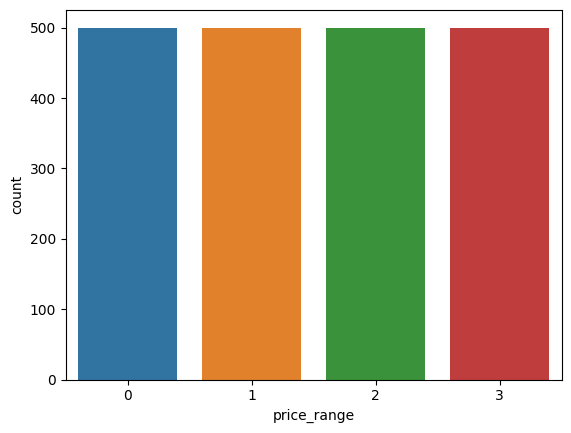

In [13]:
sns.countplot(x=df['price_range'])

Blue, four_g, three_g, dual_sim, wifi, touch_screen
These features have boolean type values i.e., whether or not each phone have these specification or not. So we can analyse them together.

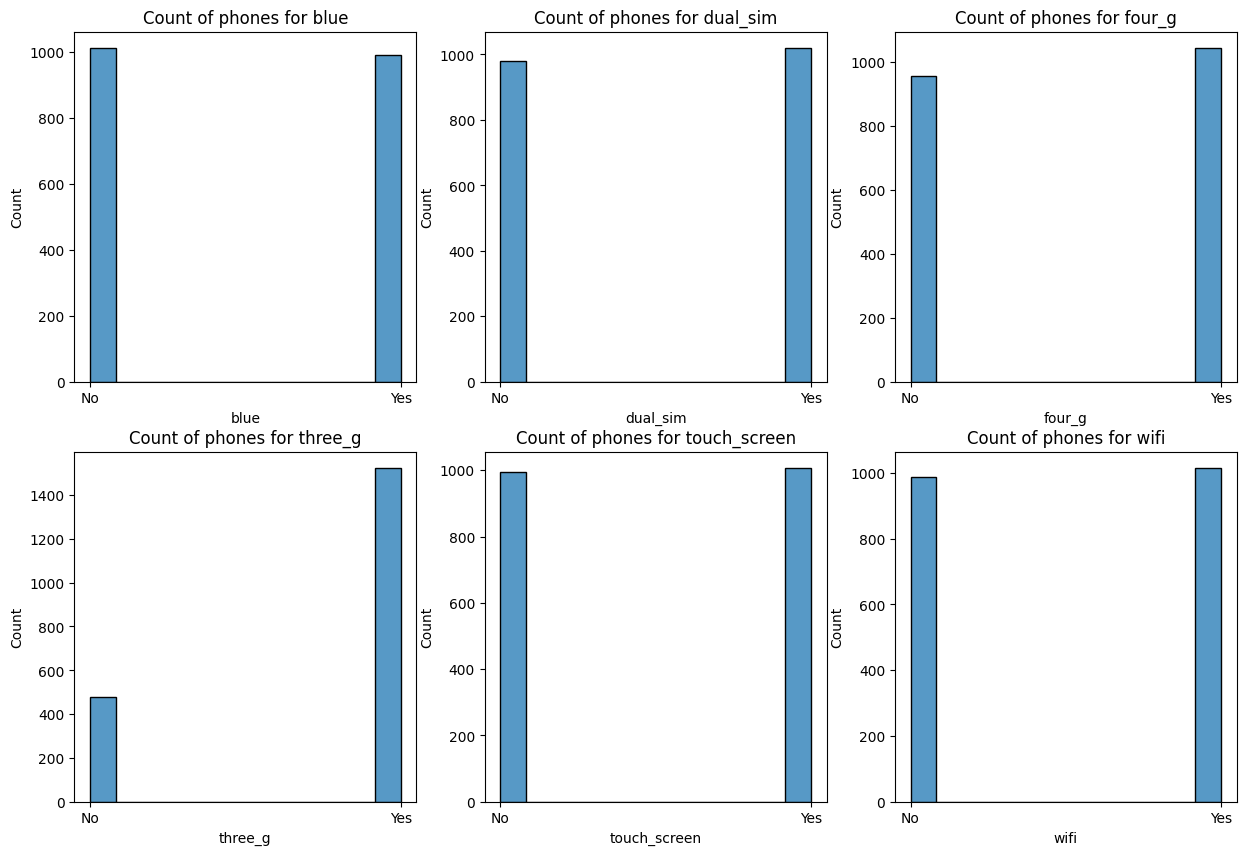

In [14]:
# creating a list of these variables

list1=['blue','dual_sim','four_g','three_g','touch_screen','wifi']



# visualizing the count of each by running a for loop

plt.figure(figsize=(15,10))
for index,item in enumerate(list1):
  plt.subplot(2,3,index+1)
  xtick=[0,1]
  label=['No','Yes']
  plt.xticks(xtick,label)
  sns.histplot(df[item])
  plt.title(f'Count of phones for {item}')

It looks like we have almost equal no. of obseravtions for all except 3g where 75% is one class.

In [15]:
# Extracting the no of cores we have

print('The no. of cores we have in our dataset are: ',sorted(list(df['n_cores'].unique())))

The no. of cores we have in our dataset are:  [1, 2, 3, 4, 5, 6, 7, 8]


Text(0.5, 1.0, 'Count of each cores of processor')

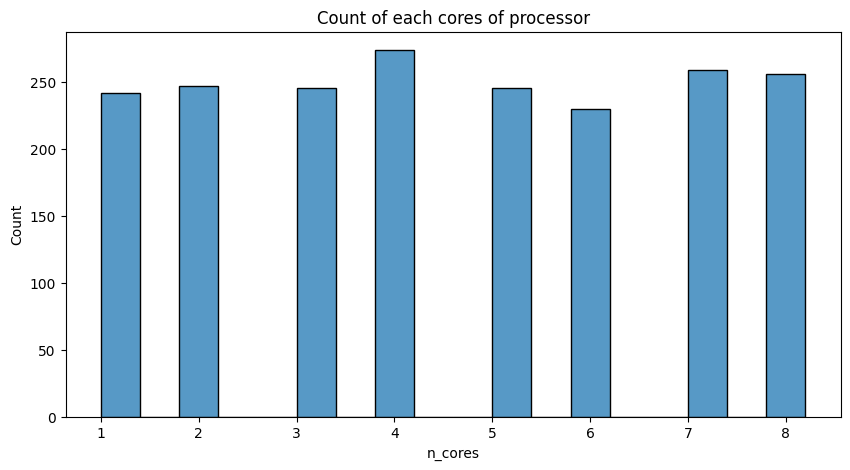

In [16]:
# Histplot to show count of each cores

plt.figure(figsize=(10,5))
sns.histplot(df['n_cores'],binwidth=0.4)
plt.title('Count of each cores of processor')

It looks like we have almost equal no. of observations for each cores with highest observation for n_cores=4.

## M_dep
m_dep tells us the thickness of the mobile phone.

In [17]:
# Extracting the depth values we have

print('The m_dep values we have in our dataset are: ',sorted(list(df['m_dep'].unique())))

The m_dep values we have in our dataset are:  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


Text(0.5, 1.0, 'Count of each depth values(cm)')

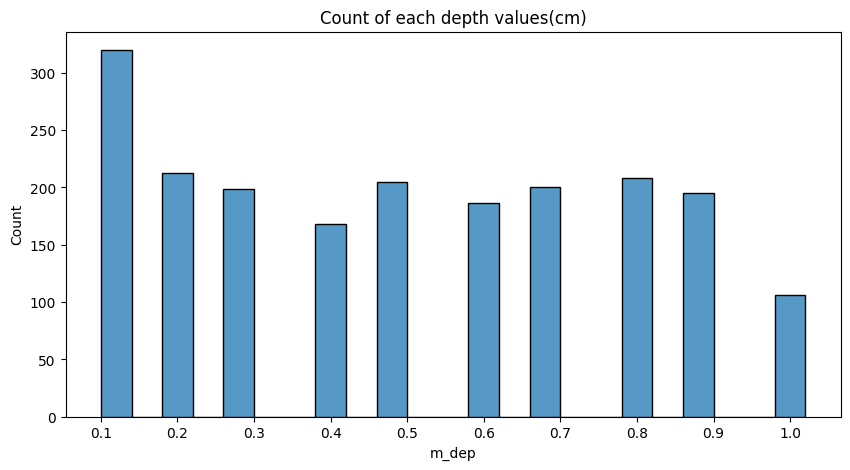

In [18]:
# Histplot to show count of each categories

plt.figure(figsize=(10,5))
xtick=sorted(list(df['m_dep'].unique()))
sns.histplot(df['m_dep'],binwidth=0.04)
plt.xticks(xtick)
plt.title('Count of each depth values(cm)')



*   There is higher no. of observations for 0.1 depth and least observations for 1 cm depth.




Clock_speed, fc, pc, sc_h, sc_w, talktime (Variables having low range values)
Let's visualize the stats of these variables using boxplot

Text(0.5, 1.0, 'Box plot for low range variables')

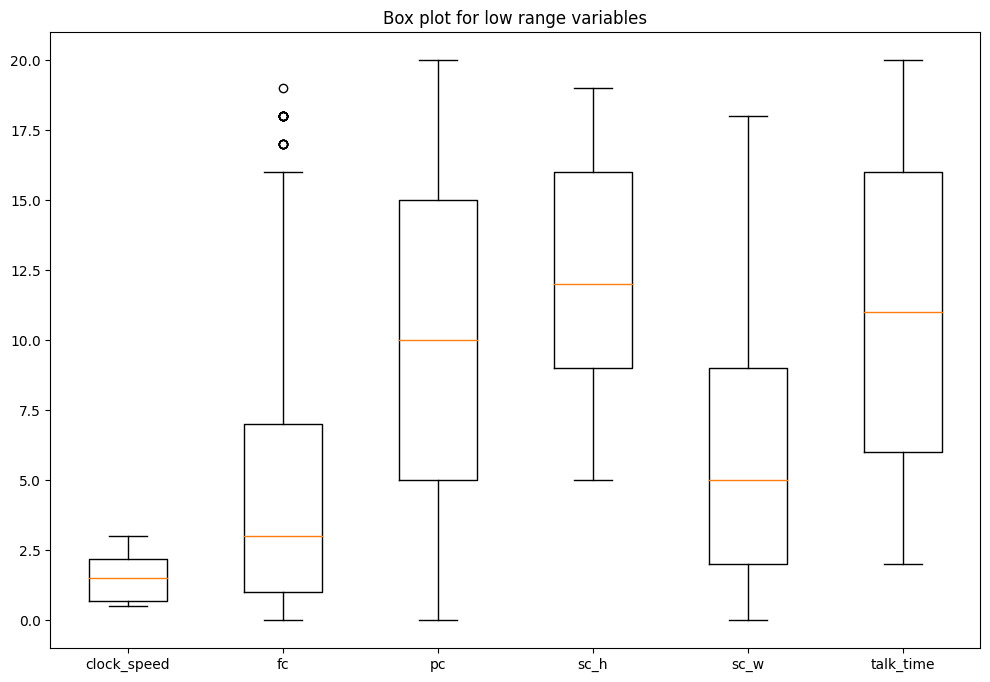

In [19]:
# Visualizing stats of these variables using box plots

plt.figure(figsize=(12,8))
xtick=[1,2,3,4,5,6]
label=['clock_speed','fc','pc','sc_h','sc_w','talk_time']
plt.boxplot(df[['clock_speed','fc','pc','sc_h','sc_w','talk_time']].values)
plt.xticks(xtick,label)
plt.title('Box plot for low range variables')

* Mean value for clock speed is around 1.5 and max and min values are 3 and 0.5 respectively.

* Mean value of front camera(fc) and primary camera(pc)in mega pixels is around 3 and 10 and min and max values are 0 , 19 for front and 0 , 19 for primary.

* Mean value of screen height(sc_h) and screen width(sc_w) is around 12 and 5 and min and max values are 5, 19 for height and 18, o for width.

* Mean value of talktime is around 11 and min and max values are 2 and 20.

### Int_memory, mobile_wt (Variables having medium range values)

Text(0.5, 1.0, 'Box plot for medium range variables')

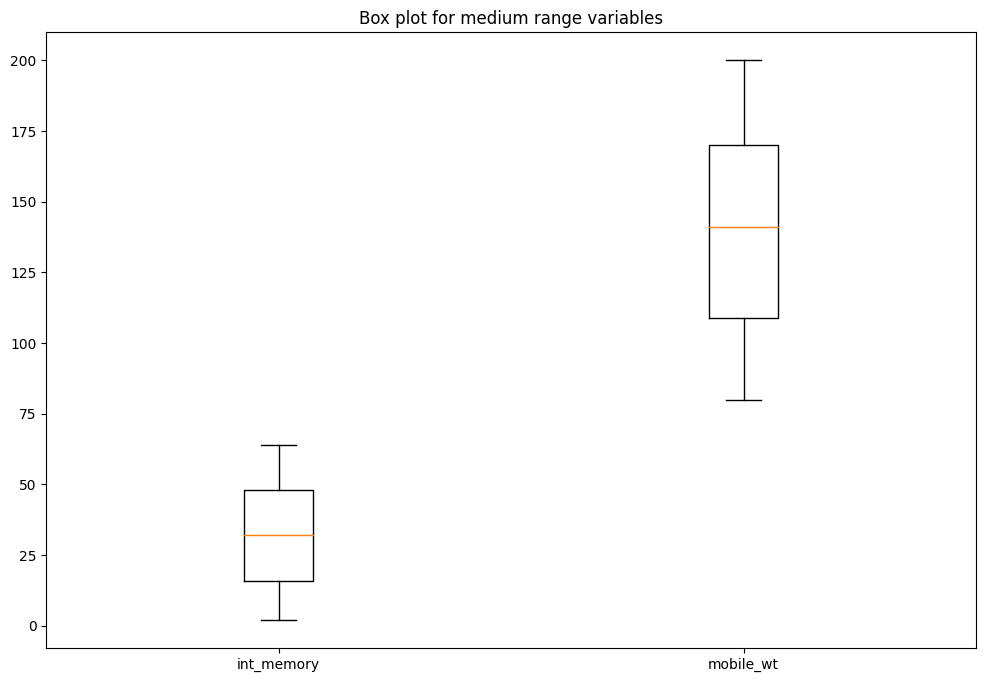

In [20]:
# Visualizing stats of these variables using box plots

plt.figure(figsize=(12,8))
xtick=[1,2]
label=['int_memory','mobile_wt']
plt.boxplot(df[['int_memory','mobile_wt']].values)
plt.xticks(xtick,label)
plt.title('Box plot for medium range variables')

Mean value for internal memory is around 32 and min and max values are 64 and 2.

Mean value for weight is around 141 and min and max values are 200 and 80.

Battery_power, px_height, px_width, ram (Variables having high range values).

Text(0.5, 1.0, 'Box plot for high range variables')

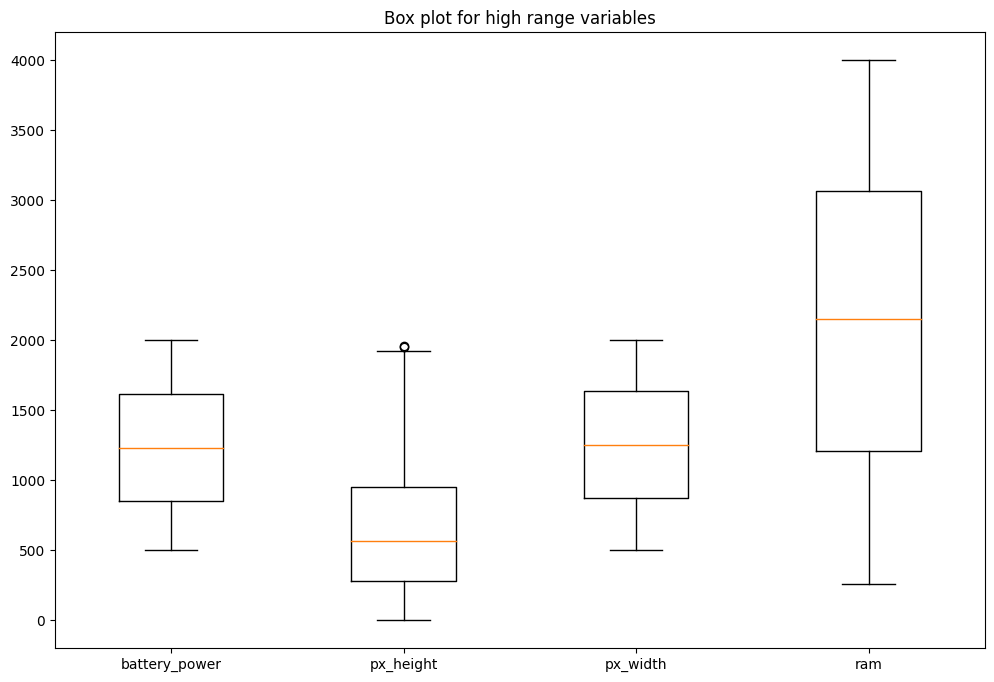

In [21]:
# Visualizing stats of these variables using box plots

plt.figure(figsize=(12,8))
xtick=[1,2,3,4]
label=['battery_power','px_height','px_width','ram']
plt.boxplot(df[['battery_power','px_height','px_width','ram']].values)
plt.xticks(xtick,label)
plt.title('Box plot for high range variables')

* Mean value for battery power is around 1226 and min and max values are 1998 and 501.

* Mean value for pixel height and width is around 564 and 1247 and min and max values are 1960,0 for height and 1998,500 for width.

* Mean value for ram is around 2146 and min and max values are 3998 and 256.

# Multivariate Analysis

Correlation matrix

Text(0.5, 1.0, 'Heatmap')

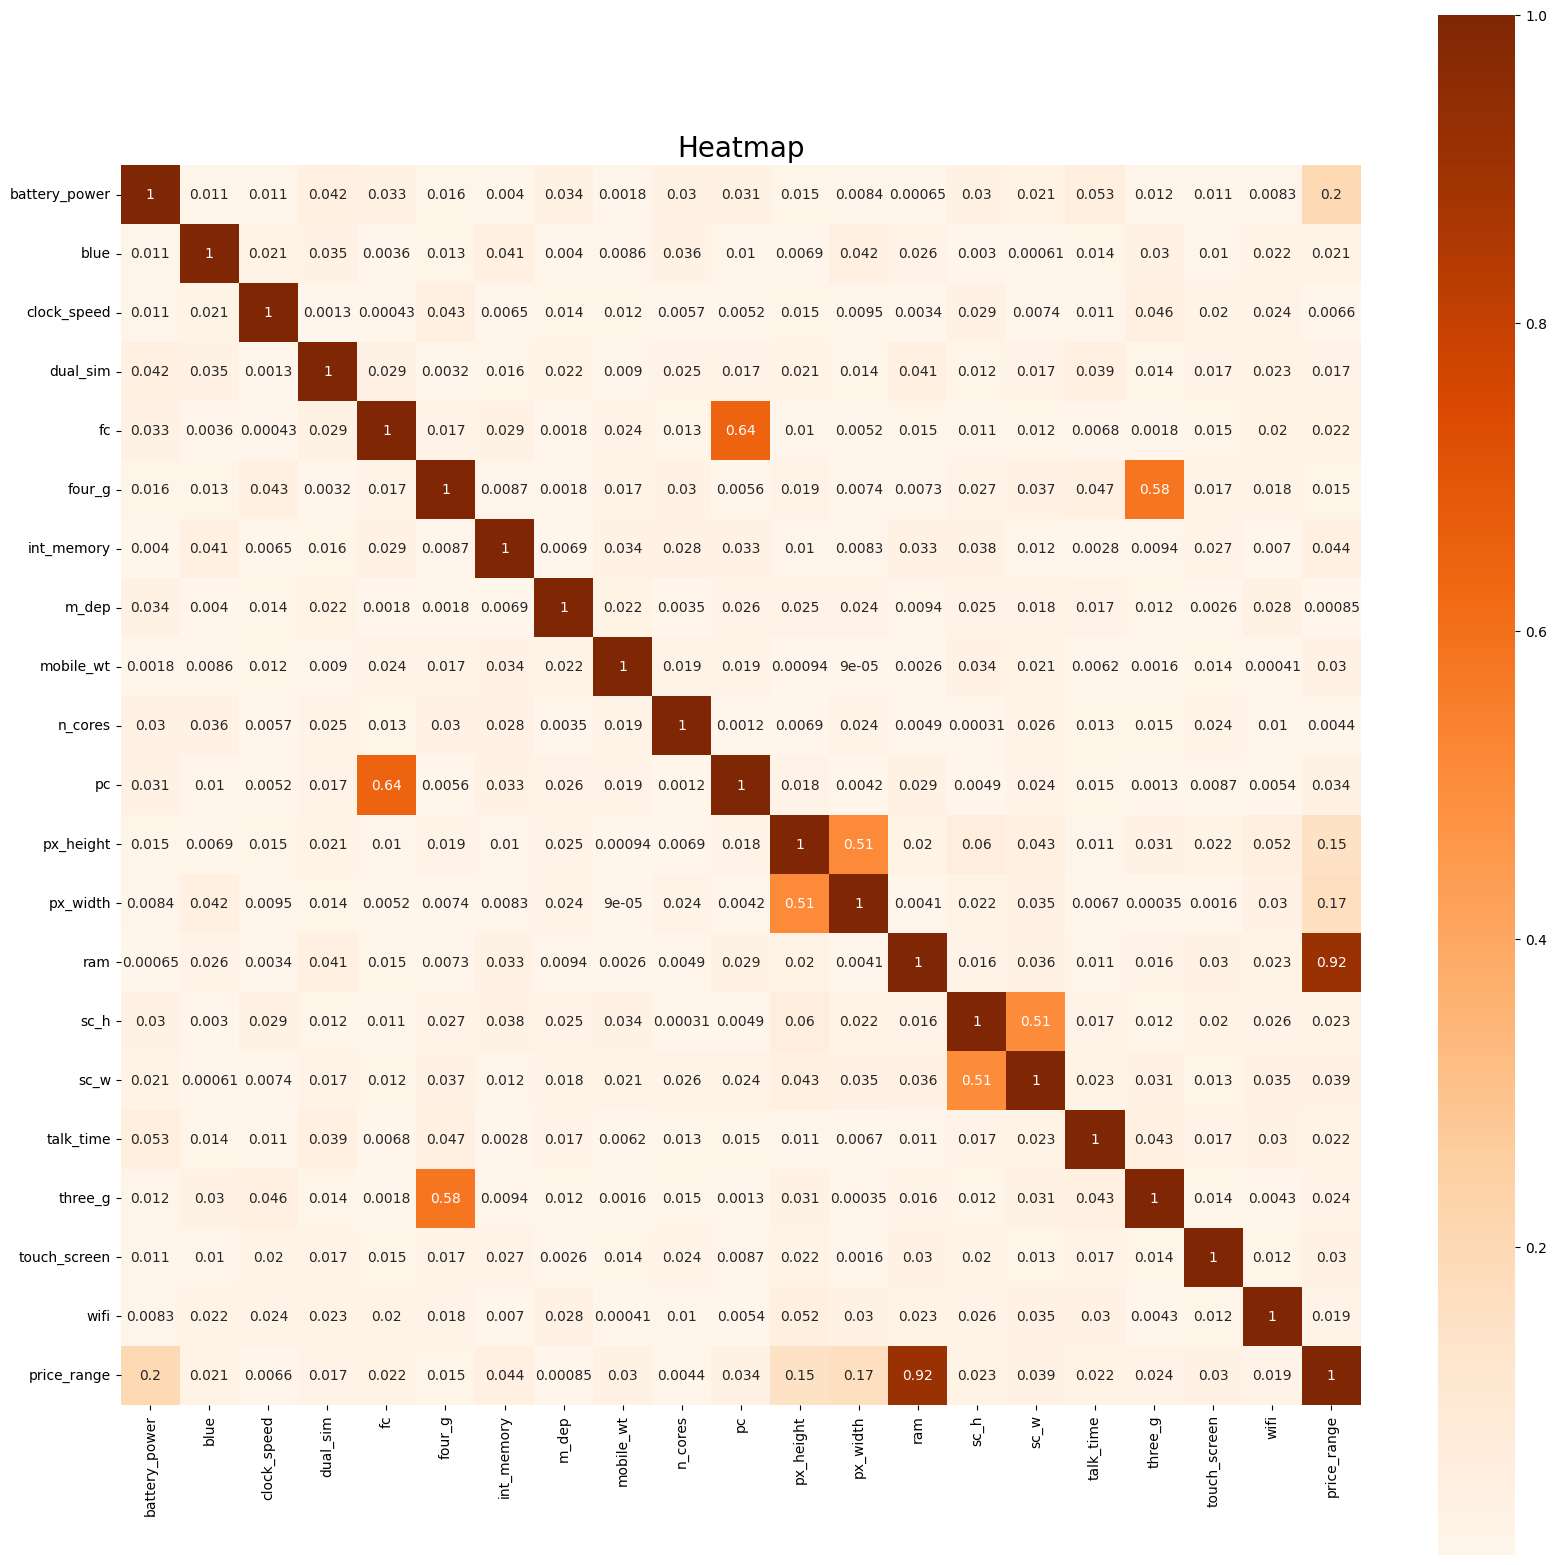

In [22]:
# Heatmap showing correlation between features

plt.figure(figsize=(20,20))
sns.heatmap(abs(df.corr()),annot=True, cmap='Oranges',square=True)
plt.title('Heatmap',fontsize=20)

Points to note from above heatmap:

* pc is correlated with fc.

* three_g and four_g are moderately correlated.

* sc_h and sc_w are moderately correlated. We will try to change them into a single variable.

* px_width and px_height are moderately correlated. We will try to change them into a single variable.

* ram is highly correlated with our price range. May be one the most important factor in determining the price.

### n_cores and m_dep V/S price_range
---



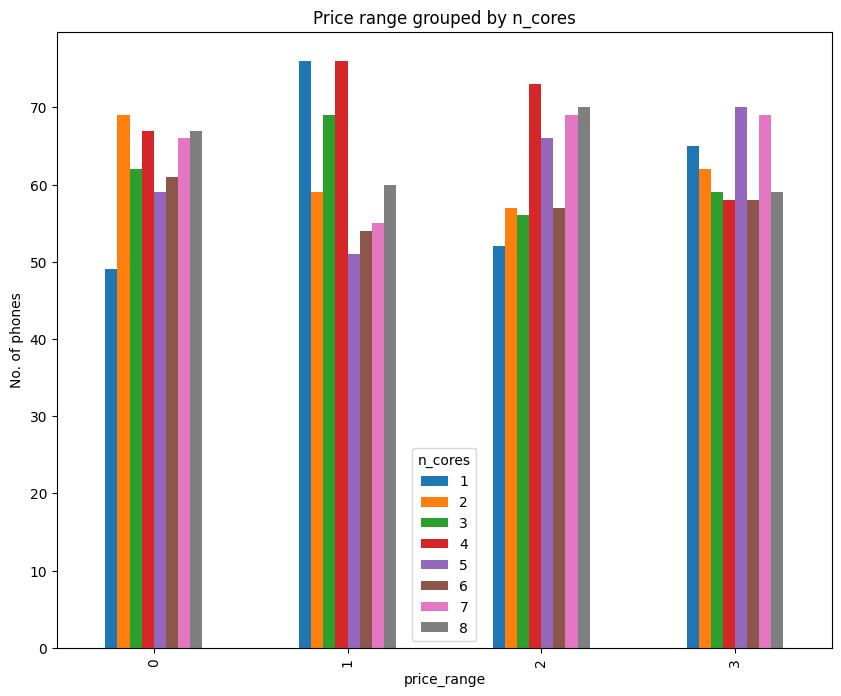

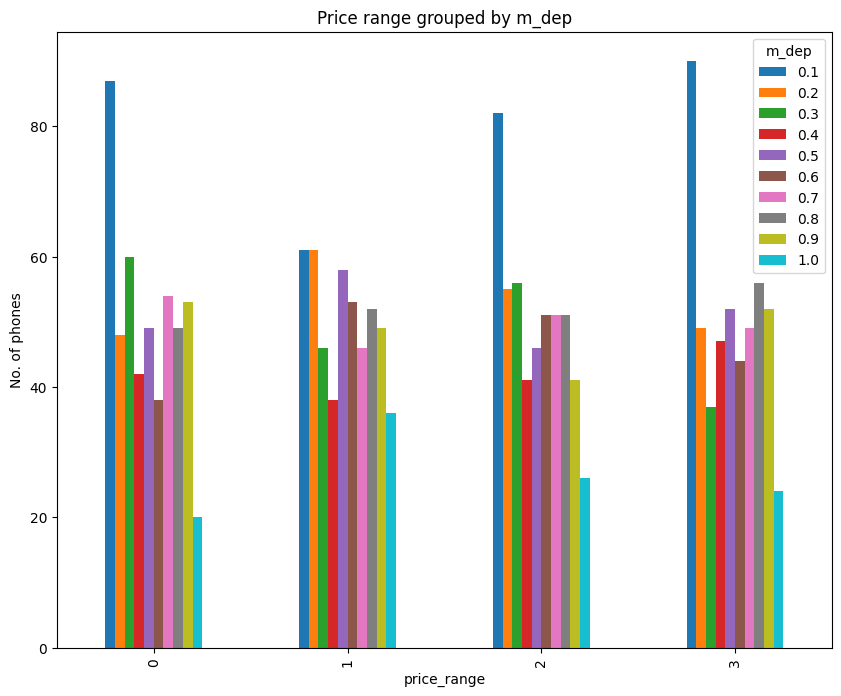

In [23]:
# Grouping price range with n_cores and m_dep and visualizing 

list1=['n_cores','m_dep']
for item in list1:
  plt.rcParams['figure.figsize']=(10,8)
  df.groupby(['price_range'])[item].value_counts().unstack().plot.bar()
  plt.title(f'Price range grouped by {item}')
  plt.ylabel('No. of phones')

Count of less n_cores is high for 0 and 1 price range.

Count of high n_cores is high for 2 and 3 price range.

Count of phones with less thickness is high and count of phones with high thickness is low.

# Blue, four_g, three_g, dual_sim, wifi, touch_screen V/S price_range

Text(0, 0.5, 'No. of phones')

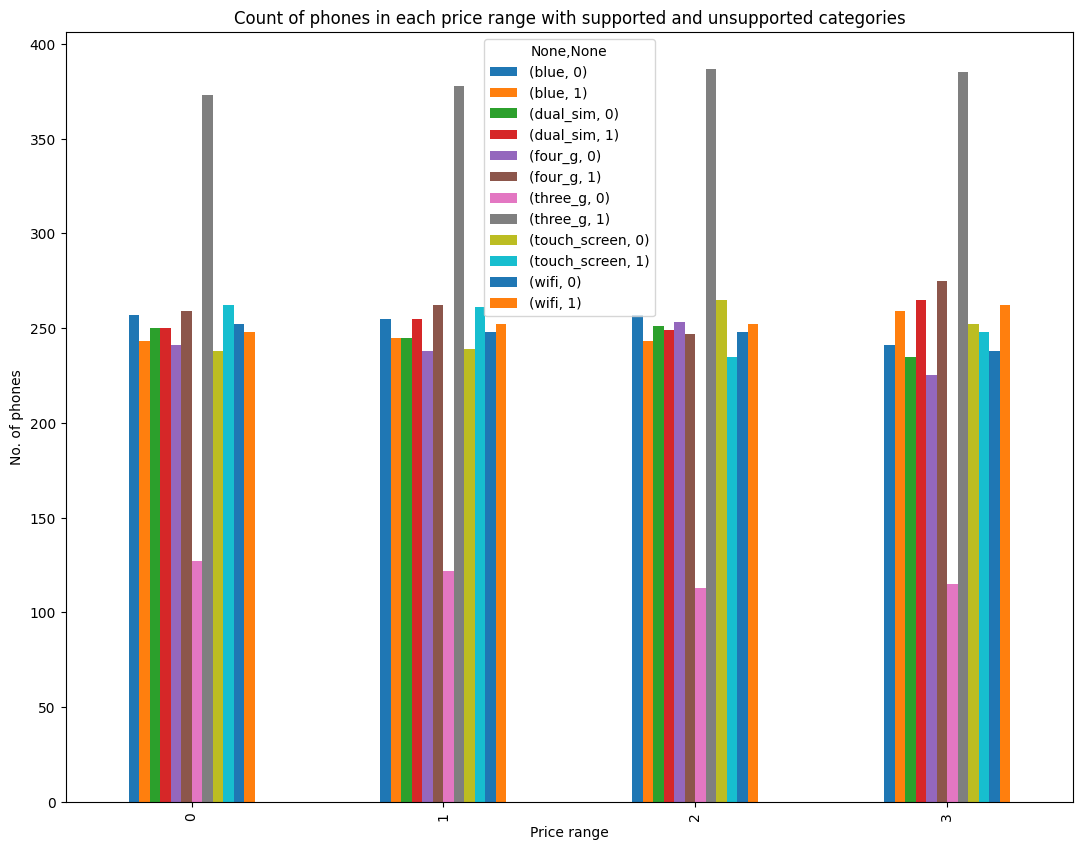

In [24]:
# Grouping price range with Blue, four_g, three_g, dual_sim, wifi, touch_screen and visualizing 

plt.rcParams['figure.figsize']=(13,10)
df.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack().plot.bar()
plt.title('Count of phones in each price range with supported and unsupported categories')
plt.xlabel('Price range')
plt.ylabel('No. of phones')

### Clock_speed, fc, pc, sc_h, sc_w, talk_time V/S price_range

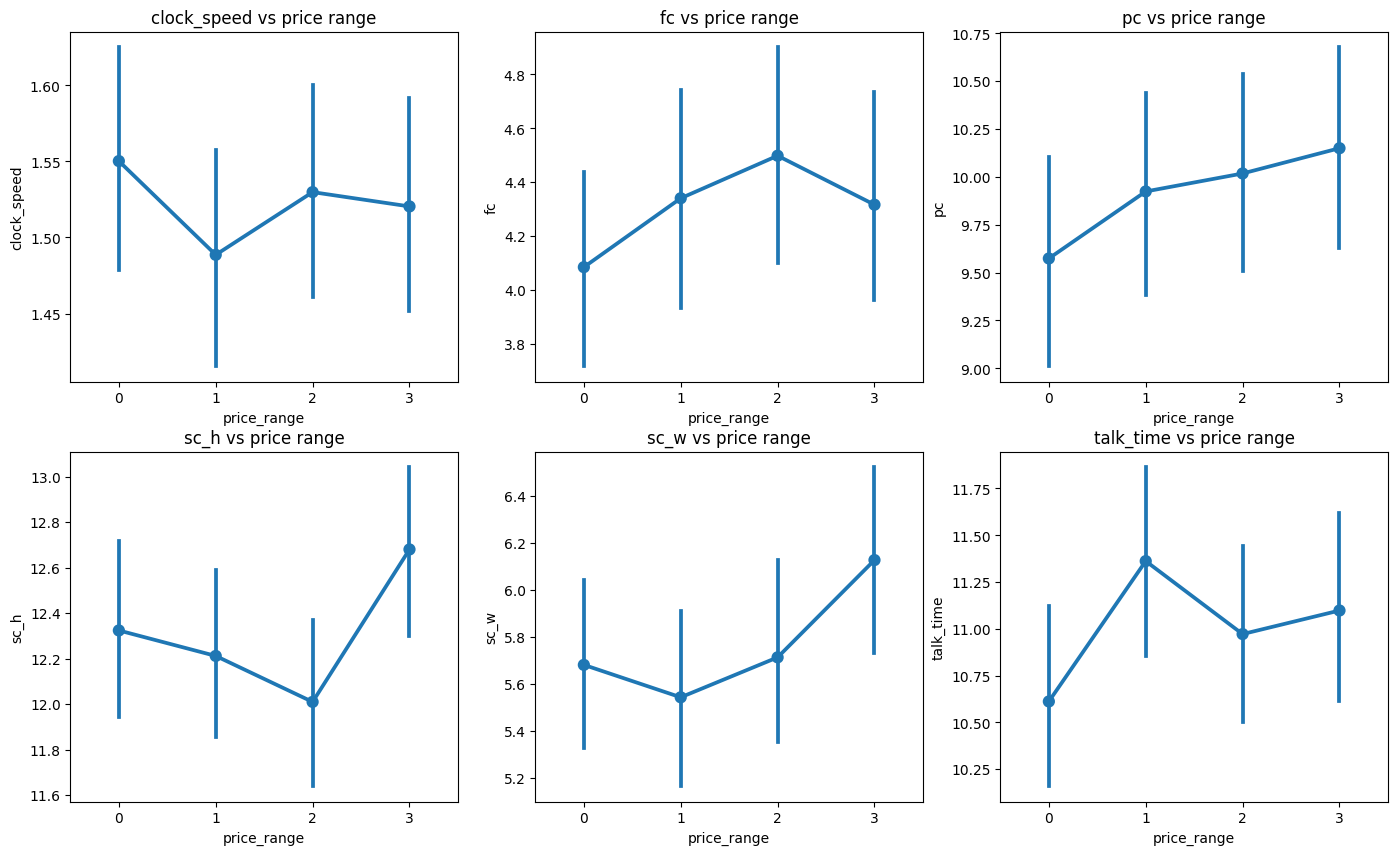

In [25]:
# Visualizing price range grouped by these variables using pointplot

list1=['clock_speed','fc','pc','sc_h','sc_w','talk_time']
plt.figure(figsize=(17,10))
for index,item in enumerate(list1):
  plt.subplot(2,3,index+1)
  sns.pointplot(x='price_range',y=item,data=df)
  plt.title(f'{item} vs price range')

* For low range price(0), the clock speed is high.

* Price range is increasing with increase in front camera and primary camera megapixel.

* Screen height and width decrease initially for increase in price range but then increses.

* Talk time is higher for high range phones comparatively.

# Int_memory, mobile_wt V/S price_range

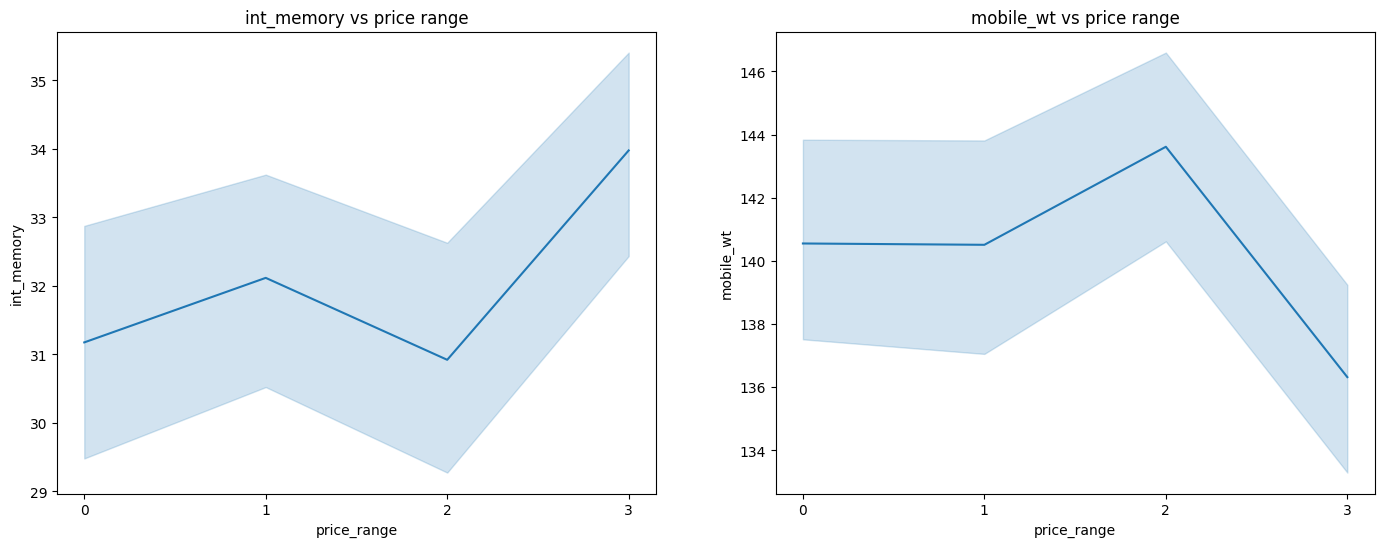

In [26]:
# Visualizing price range grouped by these variables using lineplot

list1=['int_memory','mobile_wt']
plt.figure(figsize=(17,6))
for index,item in enumerate(list1):
  xtick=[0,1,2,3]
  plt.subplot(1,2,index+1)
  sns.lineplot(x='price_range',y=item,data=df)
  plt.xticks(xtick)
  plt.title(f'{item} vs price range')

  There is drastic increase in internal memory for very high prices.

  Also there is drastic decrease in mobile weight for very high prices.

# Battery_power, px_height, px_width, ram V/S price_range

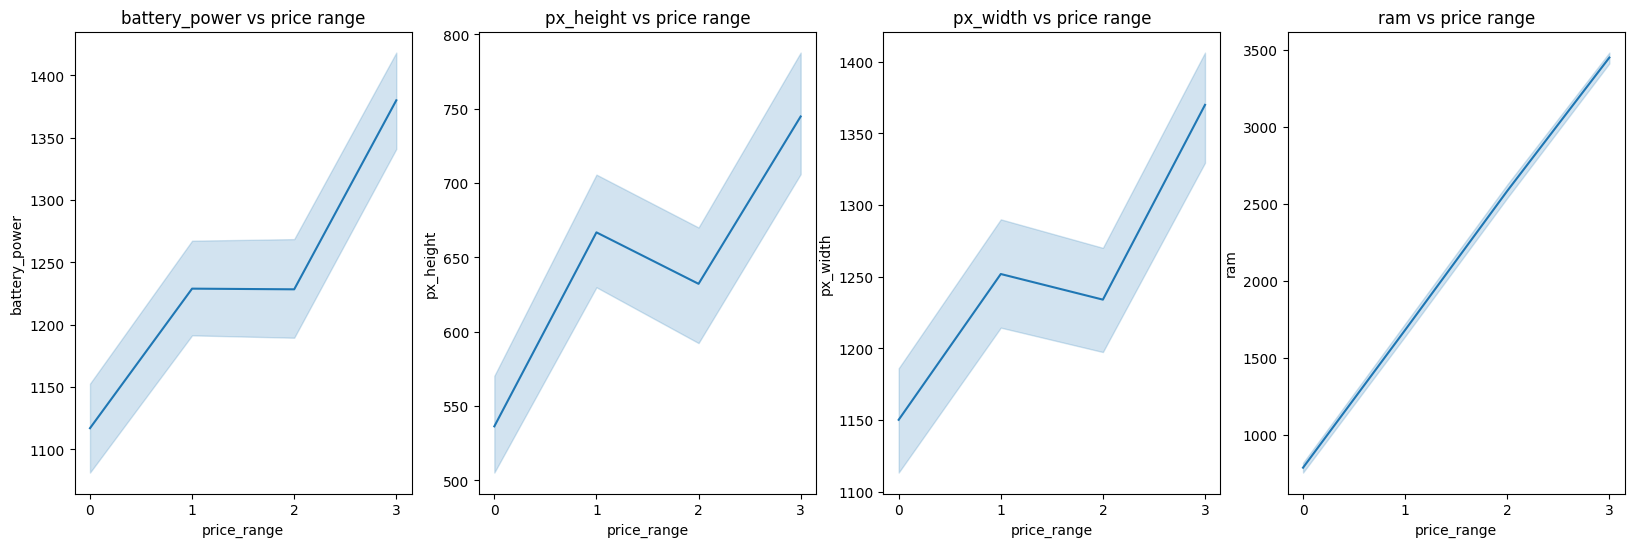

In [27]:
# Visualizing price range grouped by these variables using lineplot

list1=['battery_power','px_height','px_width','ram']
plt.figure(figsize=(20,6))
for index,item in enumerate(list1):
  xtick=[0,1,2,3]
  plt.subplot(1,4,index+1)
  plt.xticks(xtick)
  sns.lineplot(x='price_range',y=item,data=df)
  plt.title(f'{item} vs price range')

### Outliers

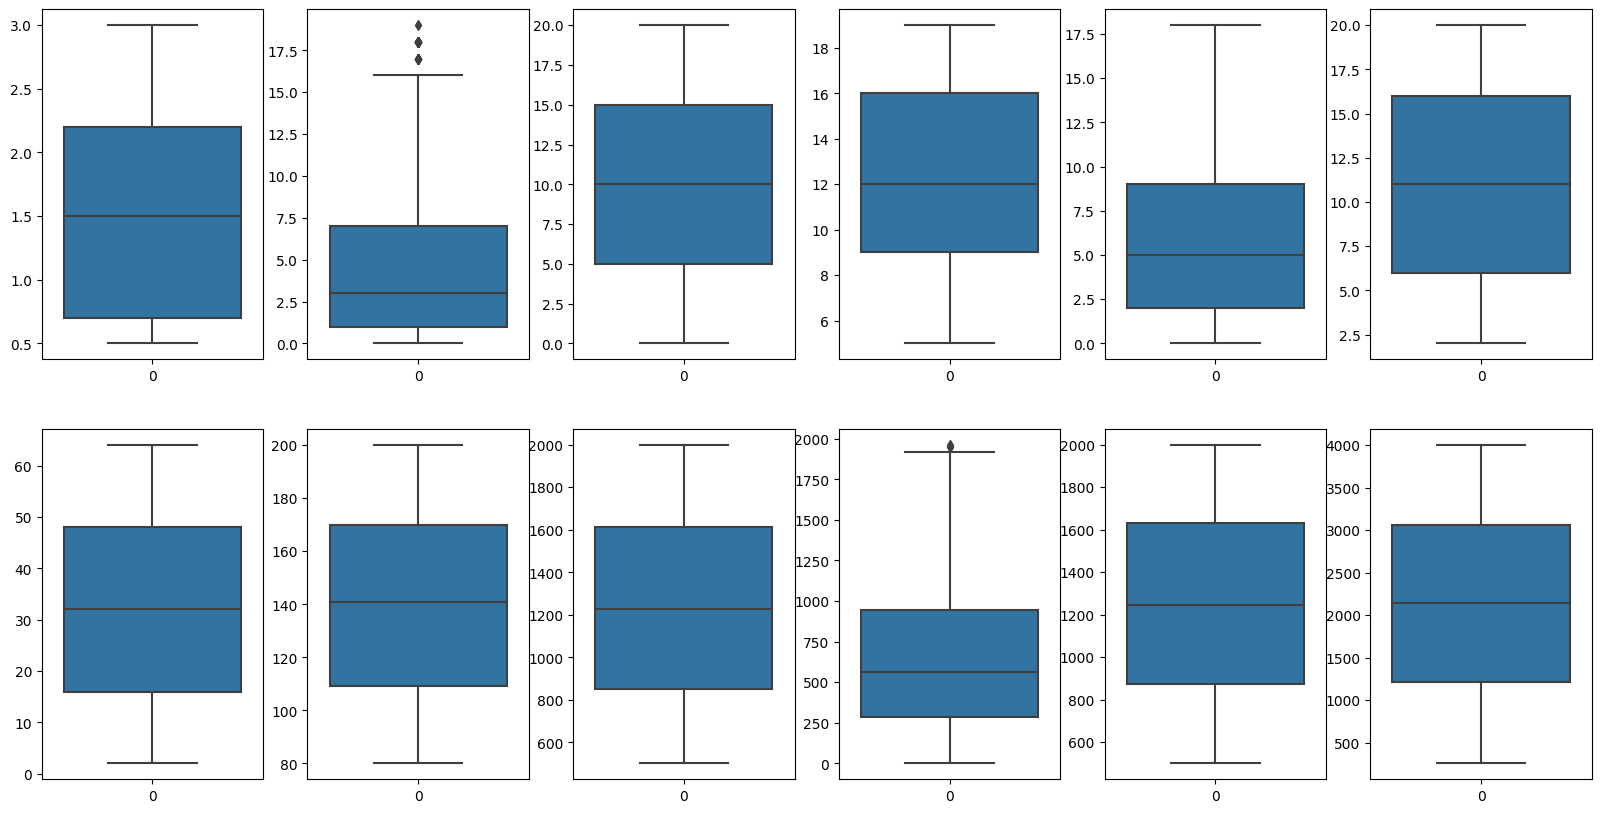

In [28]:
# Checking outliers for discrete and continous type variables using box plot

D_R_Variables=['clock_speed','fc','pc','sc_h','sc_w','talk_time','int_memory','mobile_wt','battery_power','px_height','px_width','ram']
plt.figure(figsize=(20,10))
for index,item in enumerate(D_R_Variables):
  plt.subplot(2,6,index+1)
  sns.boxplot(df[item])

## Converting the dependent variable to a binary variable (two possible labels/classes)

In [29]:
def modified_price_range(row):
  if ((row['price_range'] <2) & (row['price_range'] >=0) ):
    val = 0
  elif (row['price_range']<=3) & (row['price_range']>=2):
    val = 1
  else:
    val = -1
  
  return val

In [30]:
df['modified_price_range'] = df.apply(modified_price_range,axis = 1)

In [31]:
df['modified_price_range'].value_counts()

0    1000
1    1000
Name: modified_price_range, dtype: int64

<Axes: xlabel='modified_price_range', ylabel='count'>

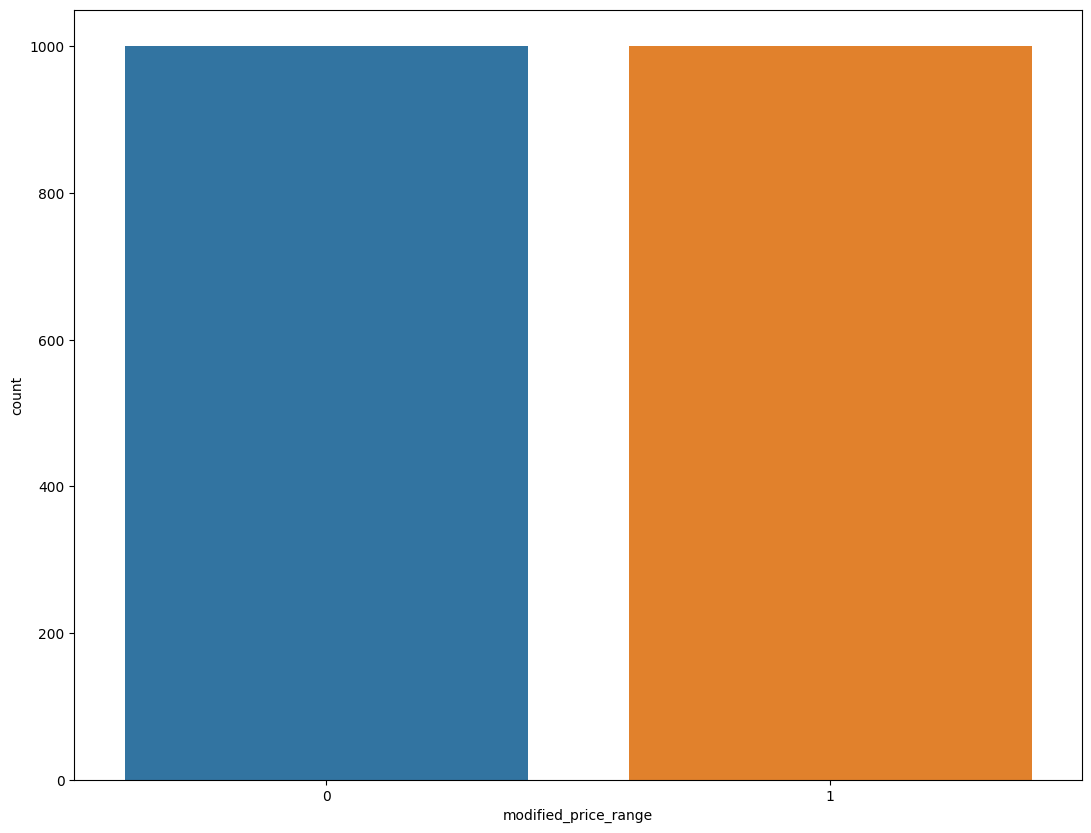

In [32]:
sns.countplot(x= df['modified_price_range'])

In [33]:
df.shape

(2000, 22)

In [34]:
df.drop('price_range',axis = 1, inplace=True)

In [35]:
df.shape

(2000, 21)